### Importando as bibliotecas

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [4]:
# Periodo:
inicio_date = '2019-01-01'
final_date = '2023-09-18'

# Seleção dos ativos:
ativos = ['PETR4', 'VALE3', 'BBDC4', 'ITSA4', 'ABEV3', 'WEGE3', 'CYRE3', 'UGPA3', 'TAEE4', 'BBAS3']

# Adicionando o .SA no final de cada ativo para ativar o yfinance reconhecer os papeis da bolsa brasileira!
ativos_brasileiros = [i +'.SA' for i in ativos]
print(ativos_brasileiros)

['PETR4.SA', 'VALE3.SA', 'BBDC4.SA', 'ITSA4.SA', 'ABEV3.SA', 'WEGE3.SA', 'CYRE3.SA', 'UGPA3.SA', 'TAEE4.SA', 'BBAS3.SA']


In [5]:
# Pesos de cada ativo na carteira:
peso = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
# 10 % em cada, totalizando 100% na soma

In [12]:
carteira = yf.download(ativos_brasileiros, start=inicio_date, end=final_date)['Adj Close']
ibov = yf.download('^BVSP', start=inicio_date, end=final_date)['Adj Close']
wege = yf.download('WEGE3.SA', start=inicio_date, end=final_date)

[*********************100%%**********************]  10 of 10 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

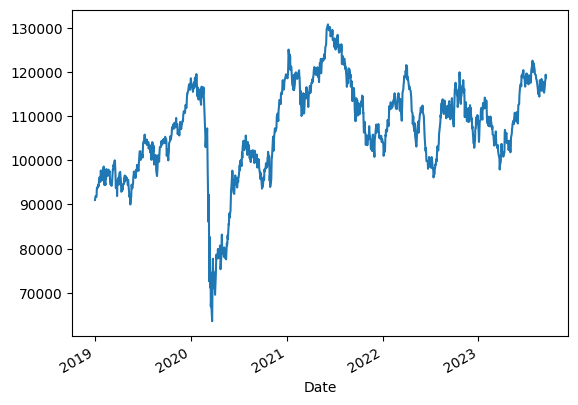

In [7]:
ibov.plot()

In [8]:
retornos = carteira.pct_change()
retornos.dropna(inplace=True)
retorno_carteira = (retornos*peso).sum(axis=1)
retorno_portifolio = pd.DataFrame()
retorno_portifolio['Retorno da Carteira'] = retorno_carteira
retorno_portifolio

,Retorno da Carteira
Date,
2019-01-03,0.004881
2019-01-04,0.010153
2019-01-07,-0.006120
2019-01-08,-0.002707
2019-01-09,0.013411
...,...
2023-09-11,0.015189
2023-09-12,0.005039
2023-09-13,-0.002469


### **MatplotLib**

MatplotLib é uma das bibliotecas de visualização de dados mais populares em Python. Ela oferece uma ampla gama de funcionalidades para criar gráficos estáticos e interativos, sendo uma ferramenta essencial para analisar e comunicar informações de forma visual. A biblioteca é altamente personalizável, permitindo que os usuários ajustem detalhes como cores, títulos, rótulos e eixos. Embora sua curva de aprendizado passa ser um pouco ingreme para alguns iniciantes. MatplotLib ofecere controle preciso sobre os elementos gráficos e é especialmente útil quando a personalização é crucial para a apresentação dos dados.

https://matplotlib.org/

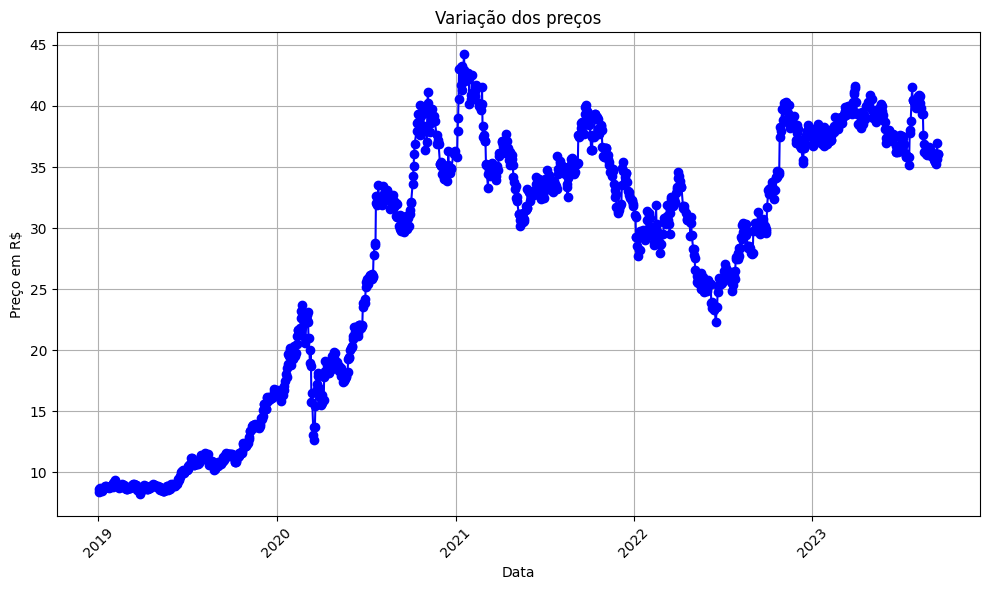

In [14]:
plt.figure(figsize=(10,6))
plt.plot(wege.index, wege['Adj Close'], marker='o', linestyle='-', color='b')
plt.xlabel('Data')
plt.ylabel('Preço em R$')
plt.title('Variação dos preços')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

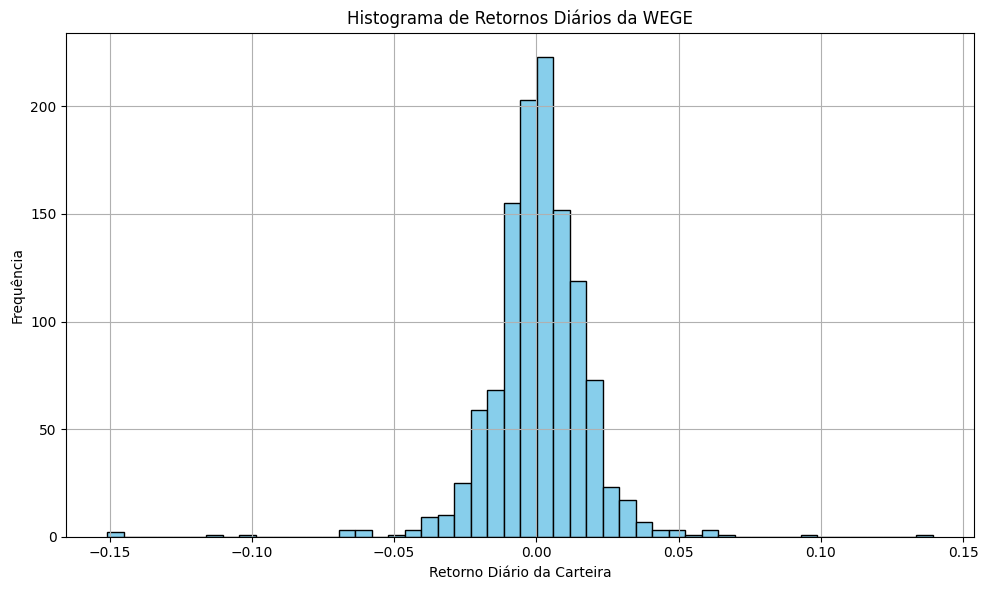

In [15]:
# Criando um gráfico de Histogrmas de Retornos
plt.figure(figsize=(10,6))
plt.hist(retorno_portifolio, bins=50, edgecolor='black', color='skyblue')
plt.xlabel('Retorno Diário da Carteira')
plt.ylabel('Frequência')
plt.title('Histograma de Retornos Diários da WEGE')
plt.grid(True)
plt.tight_layout()
plt.show()

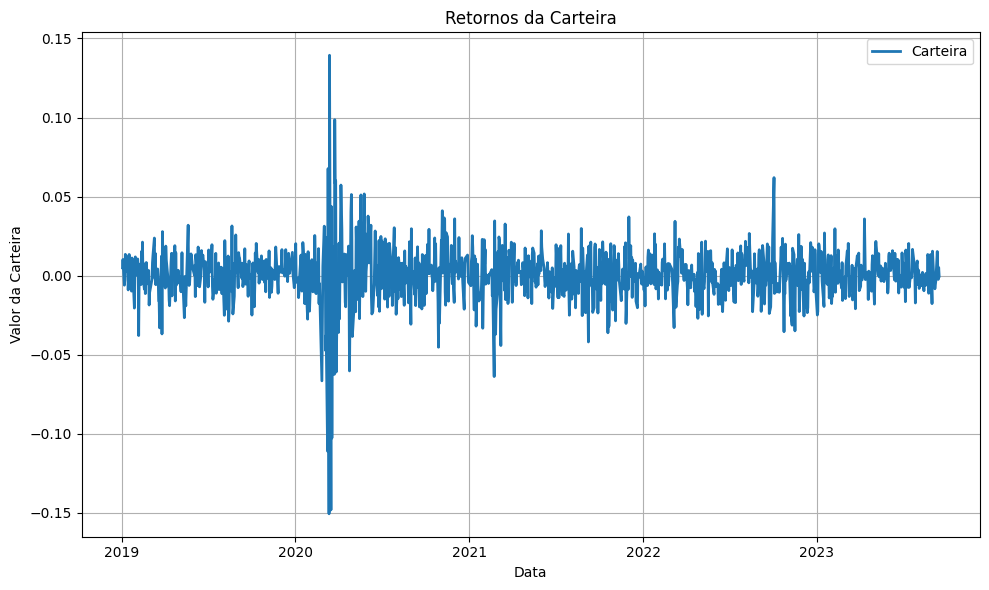

In [16]:
plt.figure(figsize=(10,6))
plt.plot(retorno_carteira.index, retorno_carteira, label='Carteira', linewidth=2)
plt.xlabel('Data')
plt.ylabel('Valor da Carteira')
plt.title('Retornos da Carteira')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

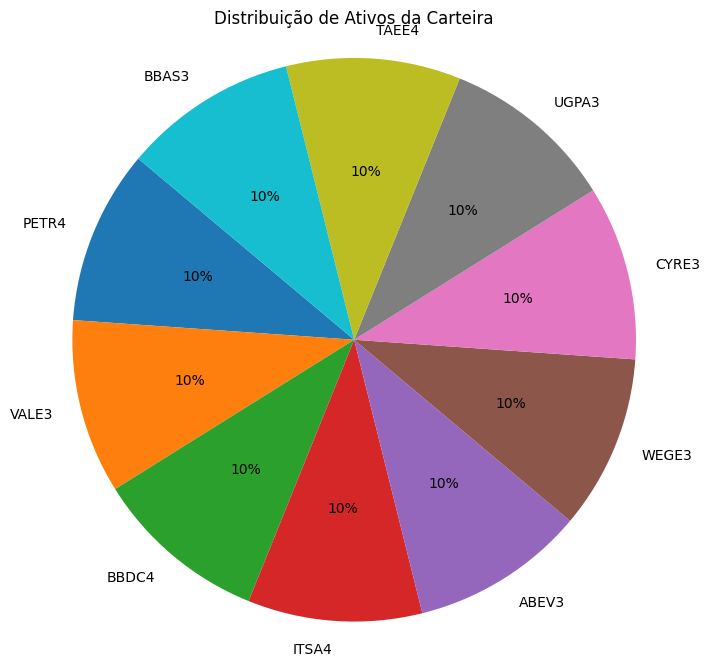

In [23]:
# Distribuição dos pesos da Carteira
plt.figure(figsize=(8,8))
plt.pie(peso, labels=ativos, autopct='%1.0f%%', startangle=140)
plt.title('Distribuição de Ativos da Carteira')
plt.axis('equal')
plt.show()

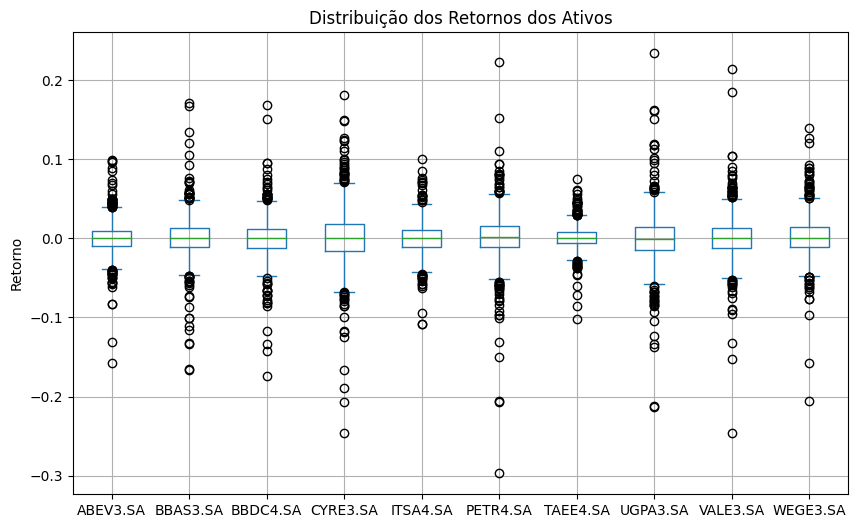

In [26]:
retornos.plot.box(figsize=(10,6), title='Distribuição dos Retornos dos Ativos')
plt.ylabel('Retorno')
plt.grid()
plt.show()

### **Seanborn**

Seaborn é uma biblioteca baseada no matplotlib, projetava específicamente para criação de gráficos estatísticos atraentes e informativos. Ele simplifica o processo de criação de visualizações complexas, oferencendo uma interface de alto nível e uma variedade de estilos predefinidos (paletas de cores). A biblioteca também suporta técnicas estatísticas avançadas, como box plots, violin plots e gráficos de densidade, tornando-a uma escolha popular para análises explanatória de dados. Seaborn é altamente recomendado para aqueles que desejam criar gráficos estatísticos de maneira eficiente e esteticamente agradável.

http://seaborn.pydata.org/

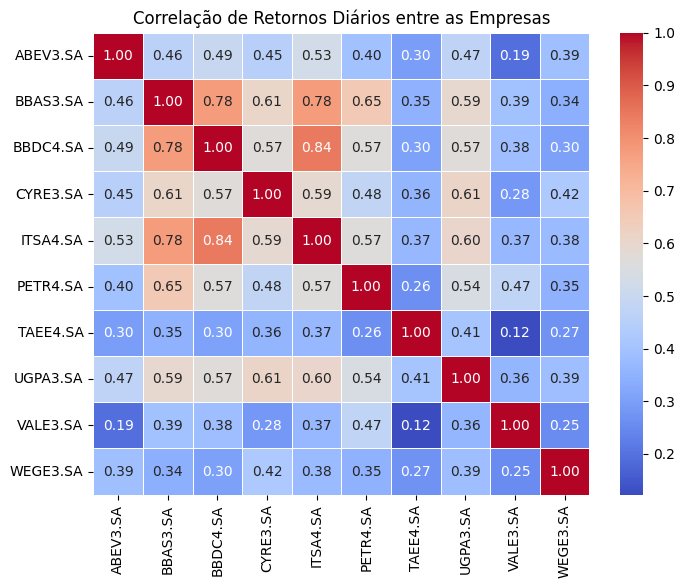

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(retornos.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação de Retornos Diários entre as Empresas')
plt.show()

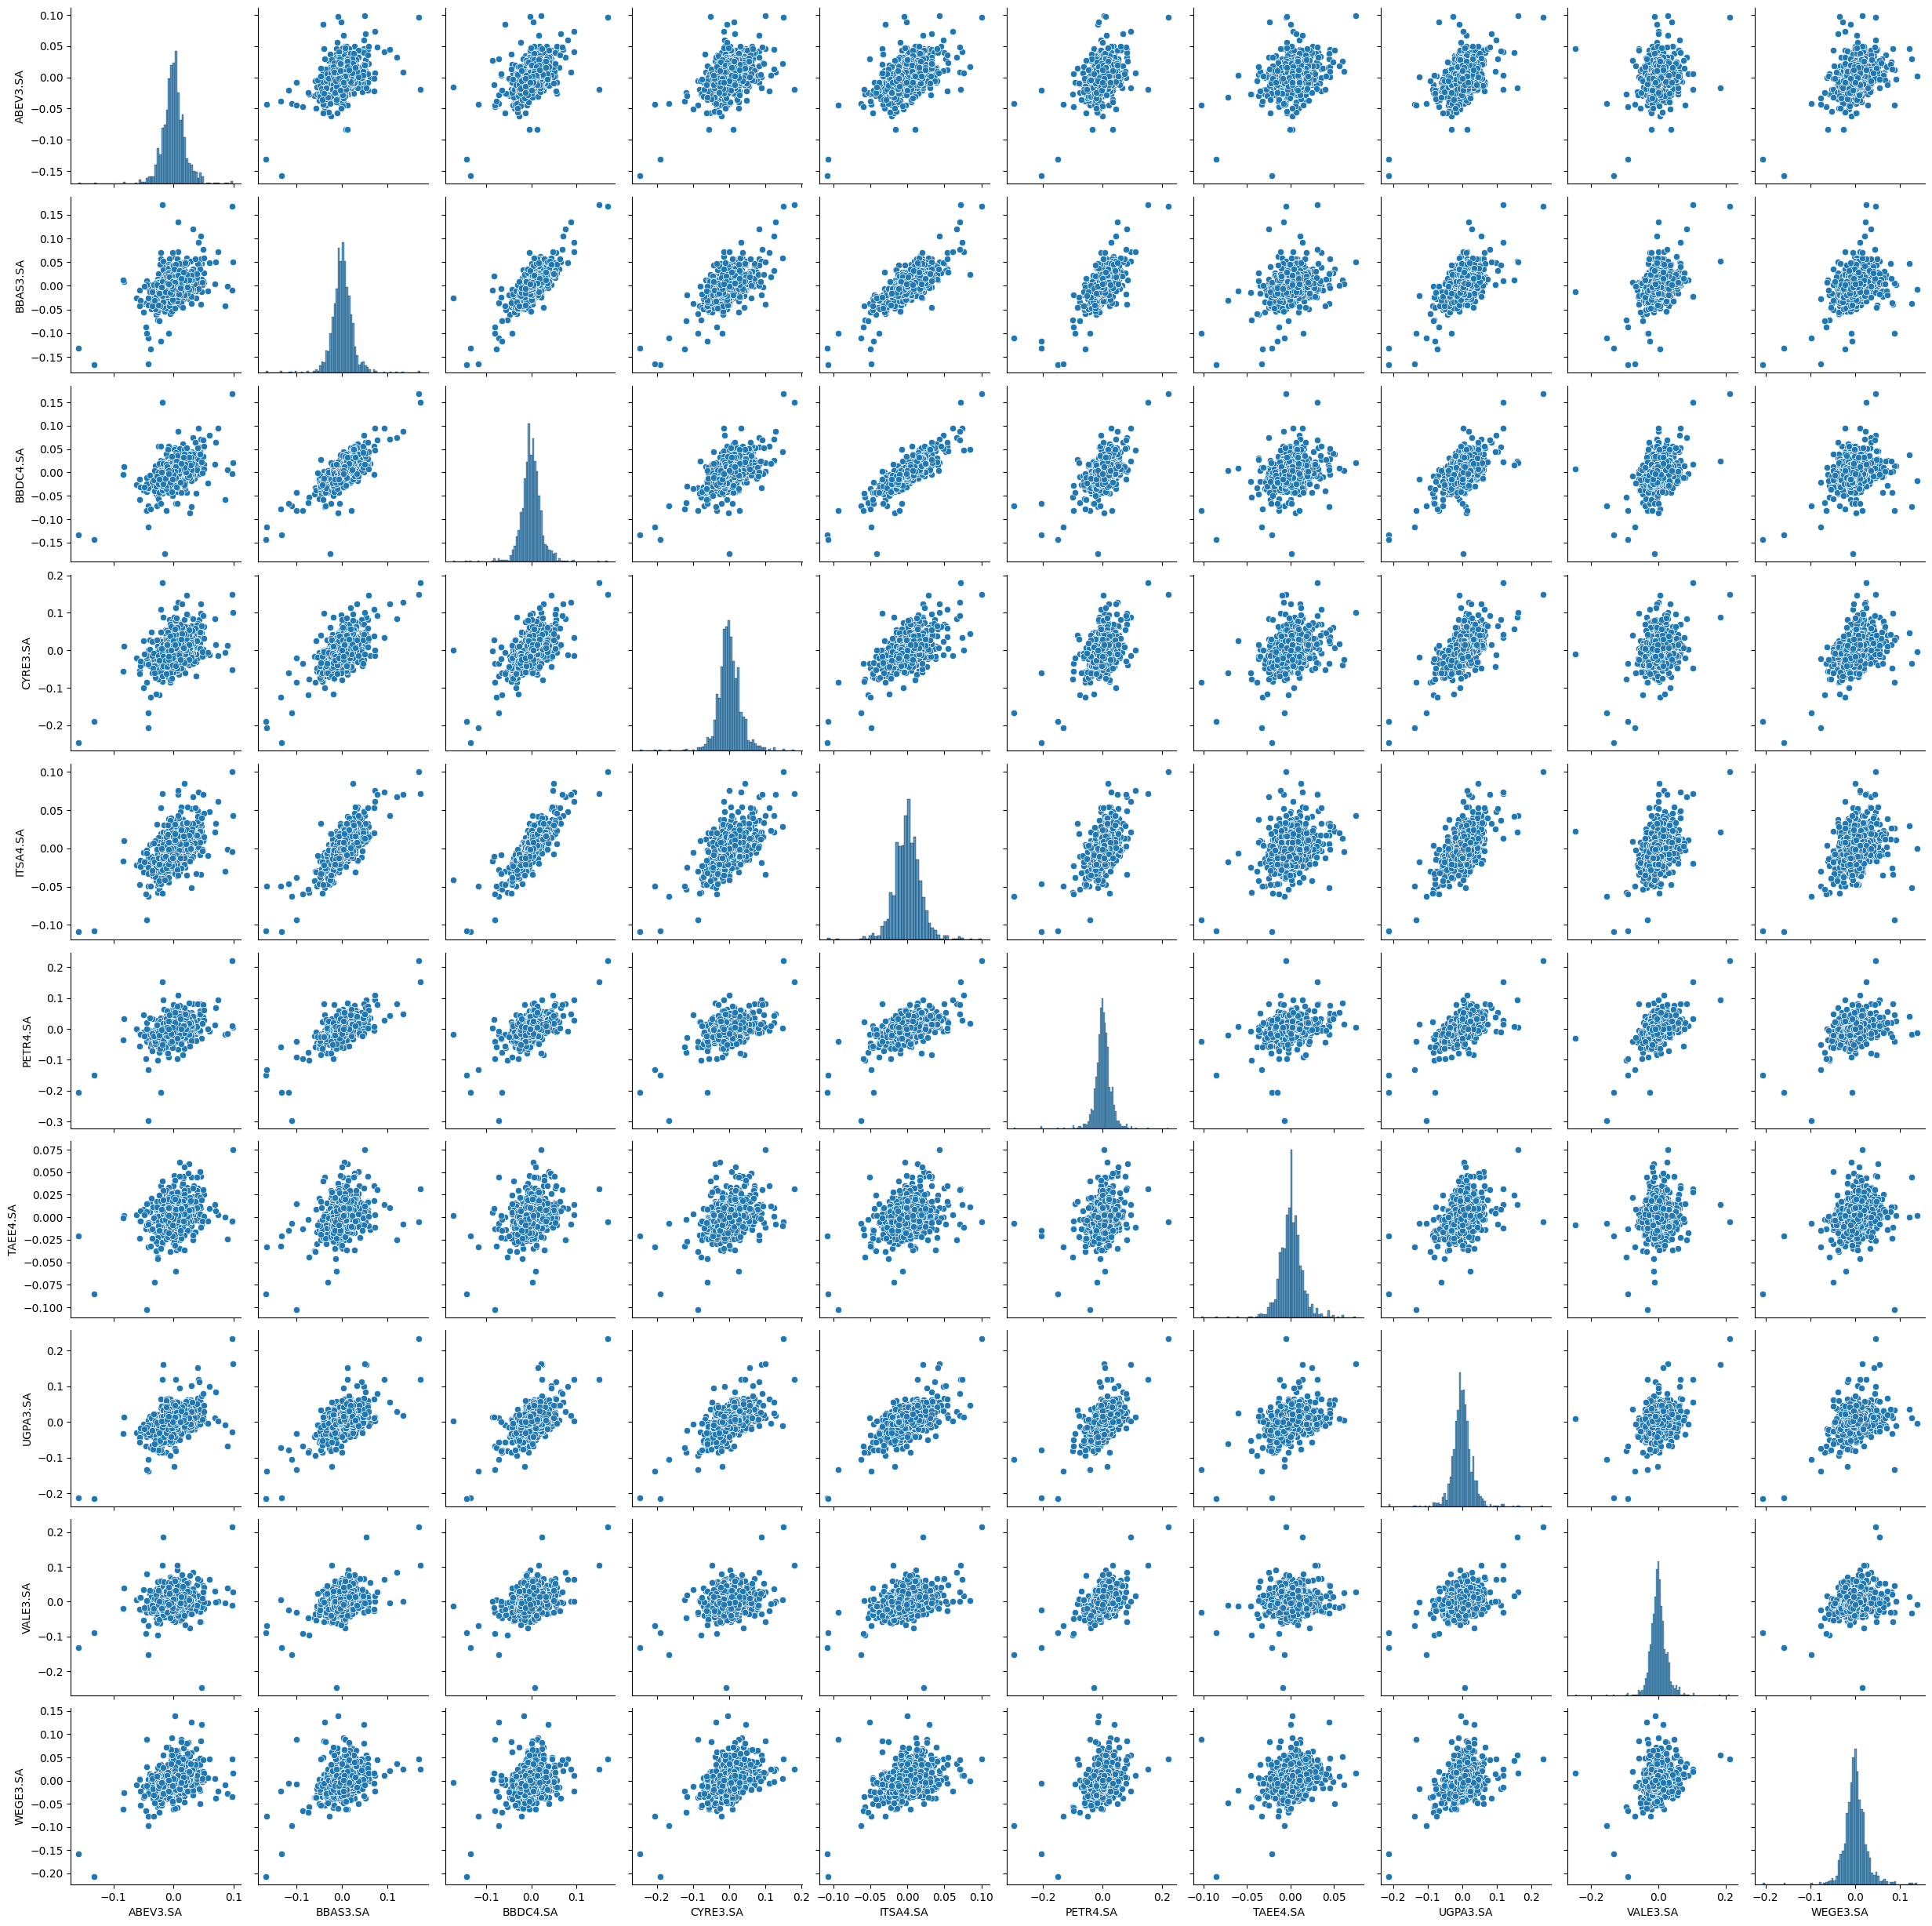

In [29]:
sns.pairplot(retornos)

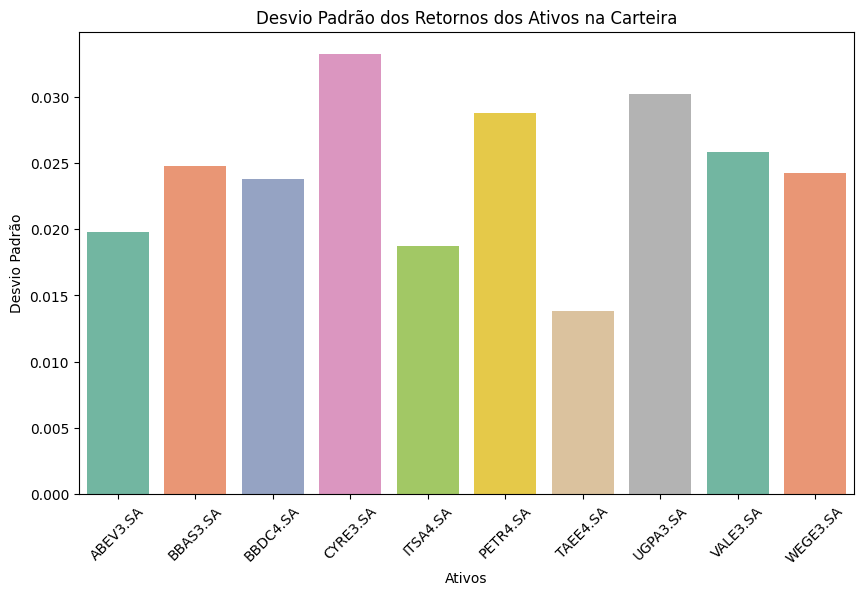

In [33]:
desvio_padrao = retornos.std()
plt.figure(figsize=(10,6))
sns.barplot(x=desvio_padrao.index, y=desvio_padrao.values, palette='Set2')
plt.title('Desvio Padrão dos Retornos dos Ativos na Carteira')
plt.xlabel('Ativos')
plt.ylabel('Desvio Padrão')
plt.xticks(rotation=45)
plt.show()

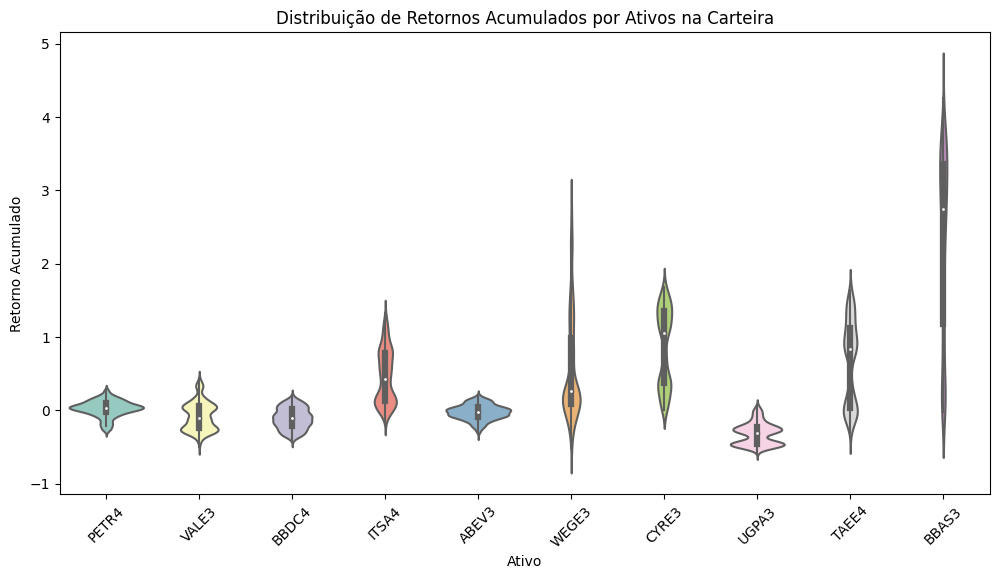

In [35]:
retorno_acumulado_carteira = (1 + retornos).cumprod() - 1  #Retorno na base 0 para expressar melhor o gráfico
retorno_acumulado_carteira.columns = ativos

# Transformando os dados em um formato longo
df_long = retorno_acumulado_carteira.reset_index().melt(id_vars=['Date'], var_name='Ativo', value_name='Retorno Acumulado')

plt.figure(figsize=(12,6))
sns.violinplot(x='Ativo', y='Retorno Acumulado', data=df_long, palette='Set3')
plt.title('Distribuição de Retornos Acumulados por Ativos na Carteira')
plt.xlabel('Ativo')
plt.ylabel('Retorno Acumulado')
plt.xticks(rotation=45)
plt.show()

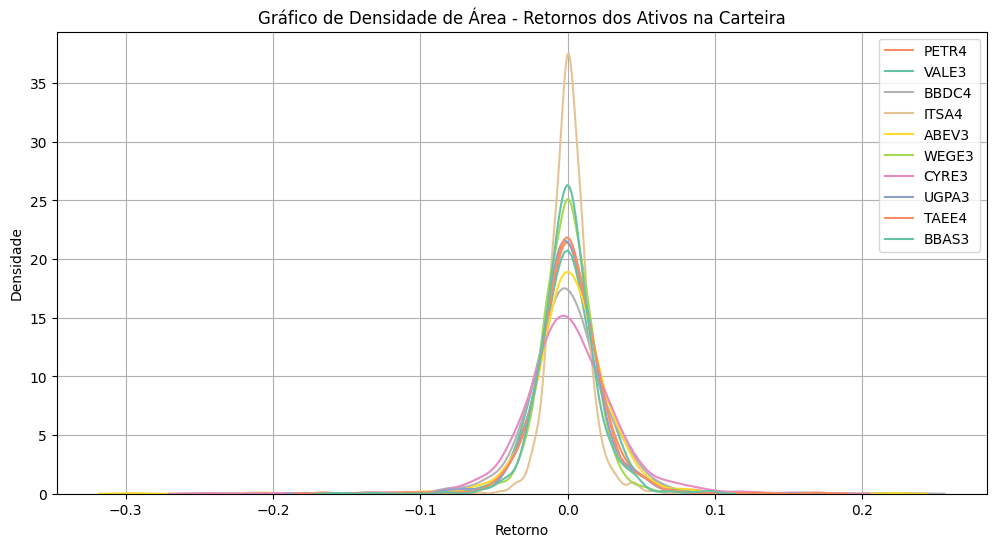

In [36]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=retornos, common_norm=False, palette='Set2')
plt.title('Gráfico de Densidade de Área - Retornos dos Ativos na Carteira')
plt.xlabel('Retorno')
plt.ylabel('Densidade')
plt.legend(labels=ativos)
plt.grid()
plt.show()

Será interessante fazer essas comparações sempre por setores

### **Plotly**

Plotly é uma biblioteca de visualização interativa que permite criar gráficos dinâmicos, dashboards e aplicações web interativas. É uma escolha poderosa para análises explanatórias e apresentações interativas de dados. Uma das principais vantagens do Plotly é sua capacidade de criar gráficos interativos com apenas algumas linhas de código, permitindo que os usuários explorem os dados em diferentes perspectivas e níveis de detalhes. Além disso, a biblioteca suporta vários tipos de gráficos, como gráficos de dispersão, barras, linhas, superfícies 3D e até mesmo mapas geográficos. Com o Plotly, os usuários podem compartilhar visualizações interativas online, tornando-a uma excelente escolha para colaborações e divulgações de informações.

https://plotly.com/python

In [39]:
retornos # = carteira.pct_change()
retorno_carteira # = (retornos*peso).sum(axis=1)
retorno_acumulado_carteira_2  = (1 + retorno_carteira).cumprod() - 1

fig = px.line(retorno_acumulado_carteira_2, title='Retorno Acumulado da Carteira')
fig.update_xaxes(title='Data')
fig.update_yaxes(title='Retorno Acumulado')
fig.update_layout(
    plot_bgcolor='white', # Cor do fundo do gráfico
    xaxis=dict(showgrid=False), # Ocultar as linhas de grade no eixo 'x'
    yaxis=dict(showgrid=False), # Ocultar as linhas de grade no eixo 'y'
    font=dict(color='black'), # Cor da fonte
)
fig.show()

In [42]:
fig = px.area(retorno_acumulado_carteira_2, title='Retorno Acumulado em Área da Carteira')
fig.update_xaxes(title='Data')
fig.update_yaxes(title='Retorno Acumulado')
fig.update_layout(
    plot_bgcolor='white', # Cor do fundo do gráfico
    xaxis=dict(fixedrange=True), # Ocultar as linhas de grade no eixo 'x'
    yaxis=dict(fixedrange=True), # Ocultar as linhas de grade no eixo 'y'
    margin=dict(t=40, l=40, b=40, r=10),
)
fig.show()

In [54]:
retorno_acumulado_ultimo = retornos.apply(lambda x: (1 + x).cumprod() - 1).iloc[-1]
retorno_acumulado_ultimo_2 = retorno_acumulado_carteira_2.iloc[-1] # a Resultante do retorno da carteira

fig = px.bar(x=ativos, y=retorno_acumulado_ultimo, title='Desempenho Individual dos Ativos - Última Observação')
fig.update_xaxes(title='Ativos')
fig.update_yaxes(title='Retorno Acumulado (Última Observação)')
fig.update_traces(marker_color='skyblue') # Cor das Barras
fig.update_layout(
    plot_bgcolor='white', # Cor do fundo do gráfico
    xaxis=dict(showgrid=False), # Ocultar as linhas de grade no eixo 'x'
    yaxis=dict(showgrid=False), # Ocultar as linhas de grade no eixo 'y'
    font=dict(color='black'), # Cor da fonte
)
fig.show()

#### Entendendo novamente meus dfs

In [48]:
retorno_acumulado_ultimo_2 = retorno_acumulado_carteira_2.iloc[-1]
retorno_acumulado_ultimo_2

0.9316235246977662

In [50]:
retorno_carteira[-1]

-0.0004640216252051021

In [52]:
retornos

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2019-01-03,0.011145,0.004115,0.010130,0.016383,0.008696,0.024522,0.010513,-0.018586,-0.040908,0.022803
2019-01-04,0.013472,0.000000,-0.007847,-0.008679,-0.003135,0.002840,0.035111,-0.006750,0.065102,0.011419
2019-01-07,-0.004230,-0.006557,0.011864,-0.005629,-0.000786,0.015777,-0.020101,-0.030583,-0.005365,-0.015591
2019-01-08,-0.020024,-0.011345,0.006107,-0.006918,0.013375,-0.005974,0.012821,-0.016553,0.009632,-0.008192
2019-01-09,0.014242,-0.002712,0.017237,0.003800,0.013198,0.020833,0.000000,0.032079,0.024423,0.011013
...,...,...,...,...,...,...,...,...,...,...
2023-09-11,0.012409,0.015866,0.018776,0.029194,0.024417,-0.000898,0.009565,0.031556,0.014391,-0.003390
2023-09-12,-0.011536,0.005403,0.012287,0.014858,0.004334,0.004795,0.002584,0.007911,-0.000739,0.010488
2023-09-13,-0.005106,-0.000846,0.004046,0.000887,0.000000,-0.014912,0.000000,-0.040816,-0.003845,0.035905


#### Gráficos Candlestick

In [57]:
fig = go.Figure()
fig.add_trace(go.Candlestick(name='WEGE', x=wege.index,
                             close=wege['Close'],
                             open=wege['Open'],
                             high=wege['High'],
                             low=wege['Low']))
fig.update_layout(xaxis_rangeslider_visible=False,
                  title_text='Gráfico de CandlesTick Diário <b>WEGE3<b>',
                  paper_bgcolor='black',
                  plot_bgcolor='white',
                  title_font_color='white',
                  width=1200,
                  height=500,
                  font_color='white')
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

In [61]:
colors = ['gold', 'darkorange']
fig = go.Figure()
fig.add_trace(go.Pie(labels=ativos, values=peso))
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.show()